In [1]:
%matplotlib inline

import os
# assumes jupyter server launched from root dir of repo
filepath = os.path.abspath(os.path.join(os.getcwd(), '..'))
%cd $filepath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append(os.path.abspath(filepath))

from common import *
from notebooks.eval_util import *

/Users/cyz/survey/active_survey


Using TensorFlow backend.


In [2]:
# Suppress verbose warnings about missing fonts
import warnings
warnings.simplefilter('ignore')

In [3]:
dataset = 'cces16_alpha'
sim_objects_filename = '{}/data/{}-sim-objects.pkl'.format(filepath, dataset)
response_filename = filepath + '/data/cces/cces16_cs.csv'
question_filename = filepath + "/data/cces/cces16_questions_short.csv"

In [4]:
sim_objects = deserialize(sim_objects_filename)

In [5]:
responses = pd.read_csv(response_filename, index_col=0)
questions = responses.columns.tolist()

In [6]:
question_df = pd.read_csv(question_filename, index_col=0)
question_to_label = {row['question']: row['text'] for index, row in question_df.iterrows()}
question_to_label

{'CC16_302': 'National Economy',
 'CC16_303': 'Past year household income',
 'CC16_304': 'Next year household income',
 'CC16_307': 'Police make R feel safe',
 'CC16_320a': 'Approve of Job - Obama',
 'CC16_320b': 'Approve of Job - Congress',
 'CC16_320c': 'Approve of Job - Supreme Court',
 'CC16_330a': 'Gun Control - Background checks',
 'CC16_330b': 'Gun Control - Gun owner privacy',
 'CC16_330d': 'Gun Control - Ban assault rifles',
 'CC16_330e': 'Gun Control - Easier concealed-carry',
 'CC16_331_1': 'Immigration - Legalize law-abiding',
 'CC16_331_2': 'Immigration - Increase border patrols',
 'CC16_331_3': 'Immigration - Legalize Dreamers',
 'CC16_331_7': 'Immigration - Deport illegal immigrants',
 'CC16_331_9': 'Immigration - None of these',
 'CC16_332a': 'Abortion - Always allow',
 'CC16_332b': 'Abortion - Only in case of rape, incest',
 'CC16_332c': 'Abortion - Ban after 20th week',
 'CC16_332d': 'Abortion - Decline insurance coverage',
 'CC16_332e': 'Abortion - No federal funds',

In [7]:
alpha = 4
opt_type='A'
v_method='row-norm'

Extracting cache for 1 simulations
Extracting cache for 1 simulations
Extracting cache for 1 simulations


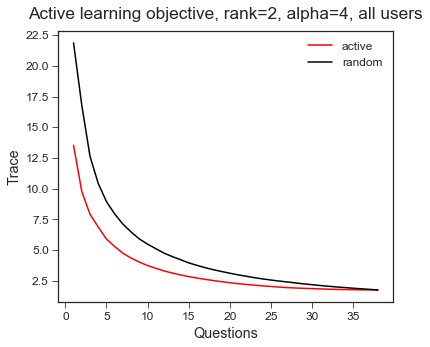

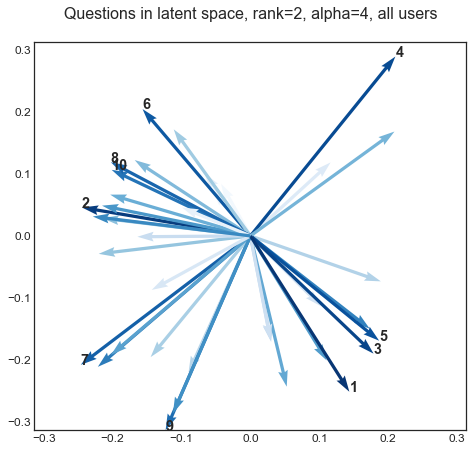

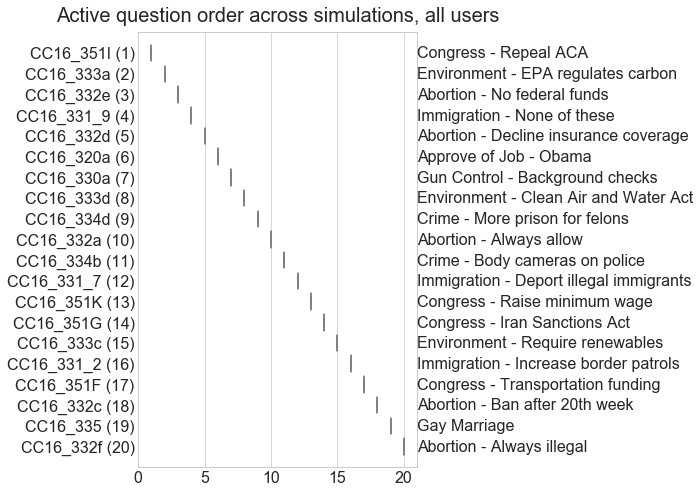

In [8]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})
plot_objective(sim_objects,
               rank=2, optimality_type=opt_type, v_method=v_method, alpha=alpha)
plot_question_order(sim_objects, questions,
                    rank=2, optimality_type=opt_type, v_method=v_method, alpha=alpha,
                    max_labels=10, max_plots=1)
plot_question_ranks(sim_objects, questions,
                    rank=2, optimality_type=opt_type, v_method=v_method, alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label,
                    show_max_questions=20)

In [9]:
# plot_objective(sim_objects,
#                rank=4, optimality_type=opt_type, v_method=v_method, alpha=alpha)
# plot_question_ranks(sim_objects, questions,
#                     rank=4, optimality_type=opt_type, v_method=v_method, alpha=alpha,
#                     show_question_labels=True, question_to_label=question_to_label)

In [10]:
# plot_question_ranks(sim_objects, questions,
#                     rank=4, optimality_type=opt_type, v_method=v_method, alpha=alpha,
#                     show_question_labels=True, question_to_label=question_to_label, 
#                     sort_by_rank=False)